--------------------------------
## **Context** 
-------------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.

--------------------------------
## **Dataset Intro** 
-------------------------------
Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

Sl_no - Customer Serial Number
Customer Key - Customer identification
Avg_Credit_Limit - Average credit limit (currency is not specified, you can make an assumption around this)
Total_Credit_Cards - Total number of credit cards
Total_visits_bank - Total bank visits
Total_visits_online - Total online visits
Total_calls_made - Total calls made

In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data= pd.read_csv("Credit+Card+Customer+Data.csv")
data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### First Look at the data ###

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


There are 660 rows and 7 columns in the dataset. All columns have numerical (integer) values and none of them have any null values so this will make our analysis easy.

In [5]:
data.Sl_No.nunique()

660

As anticipated, Sl_no is simple a unique identifier and should be dropped as it will not add any value to the analysis.

In [6]:
data.drop(columns = "Sl_No", inplace = True)

**Lets verify if cust_key column has unique values.

In [7]:
data.Customer_Key.nunique()

655

In [8]:
data.Customer_Key.value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer_Key, Length: 655, dtype: int64

cust_key has 5 values that are duplicated since out of the total rows of 660, this column has 655 rows. We were also able to identify the rows that have 2 entries each. We willdrop the duplicate rows of Customer_Key from the data set, only keeping the first row for each duplication.

In [9]:
data.drop_duplicates(subset='Customer_Key', keep='first', inplace=True)

In [10]:
data.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [11]:
data.Customer_Key.value_counts()

87073    1
70707    1
26604    1
58019    1
87219    1
        ..
68003    1
79632    1
73811    1
72892    1
80150    1
Name: Customer_Key, Length: 655, dtype: int64

Summary Stats

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


### Observations: ###

On average, each customer visited the bank 2.4 times in person and 2.6 times online. The phone calls per customer is slightly higher at average of count 3.6.

Credit limit for the bank's customers ranges from 3000 to 200,000 which is a very large range as is evident from the high standard deviation of $37,240.

Customers on average carry 4.7 credit cards.

We will need to look at univariate plots to see what percentage of people have never used their bank services be it online, in person or over the phone. We are concerned about since we see the minimum value for calls/visits is 0.

Customer_Key
Skew : 0.05


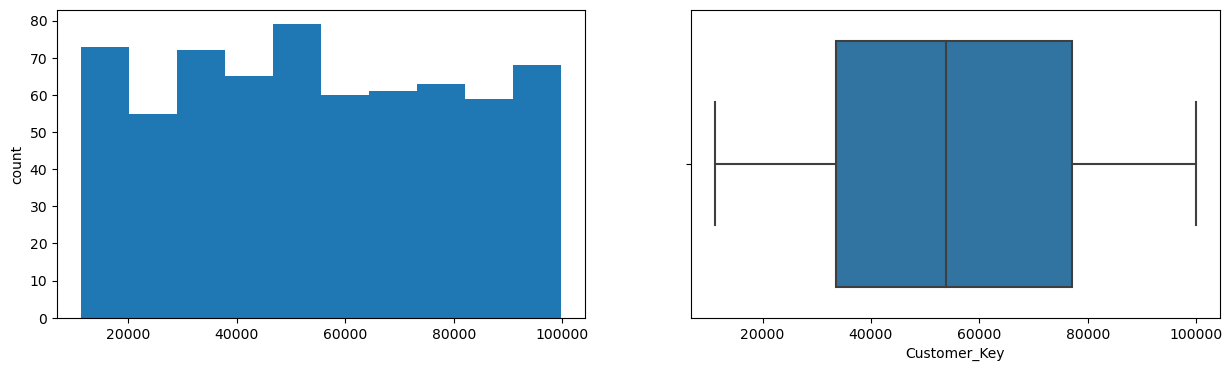

Avg_Credit_Limit
Skew : 2.21


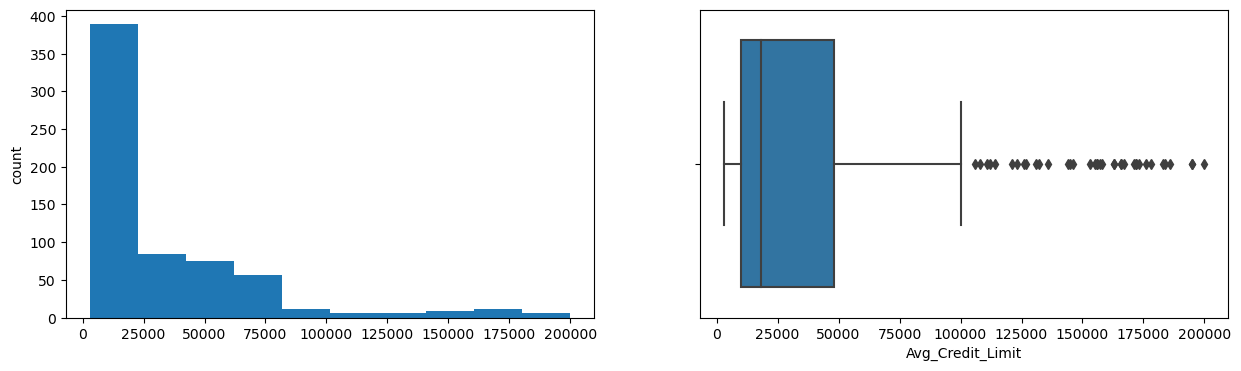

Total_Credit_Cards
Skew : 0.16


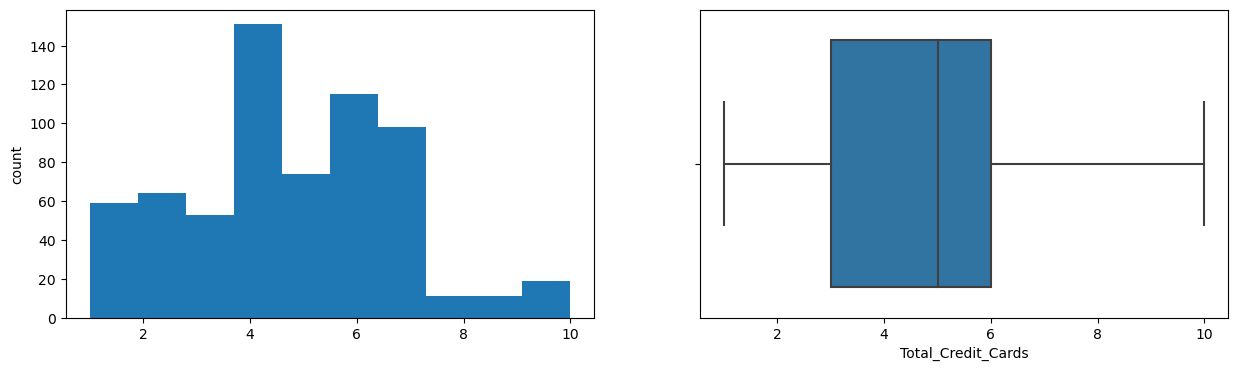

Total_visits_bank
Skew : 0.14


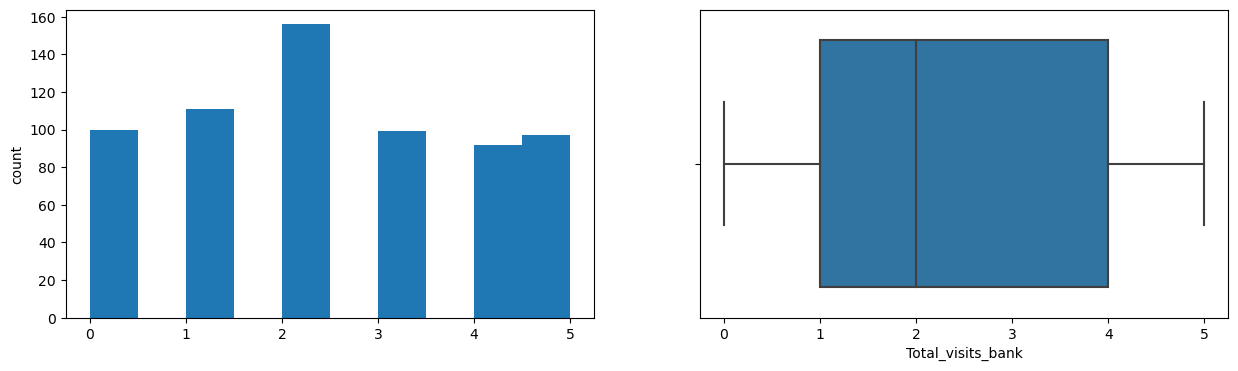

Total_visits_online
Skew : 2.23


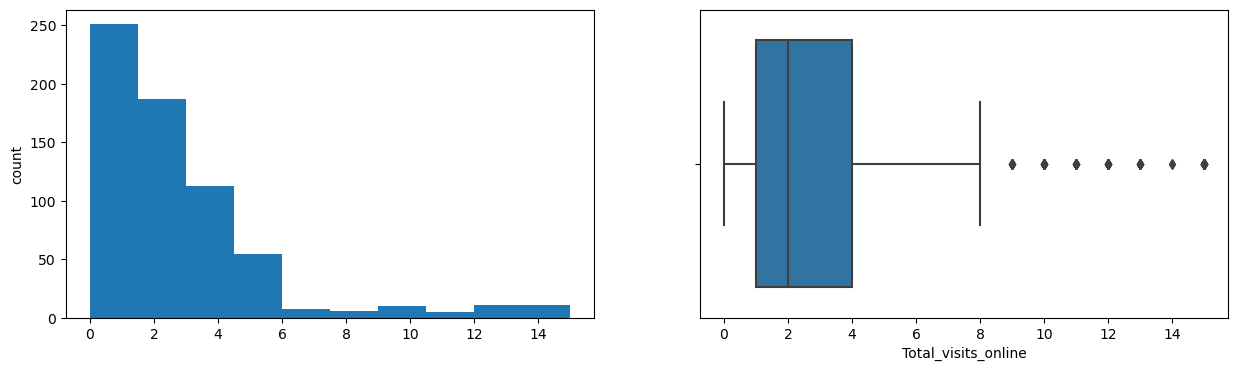

Total_calls_made
Skew : 0.65


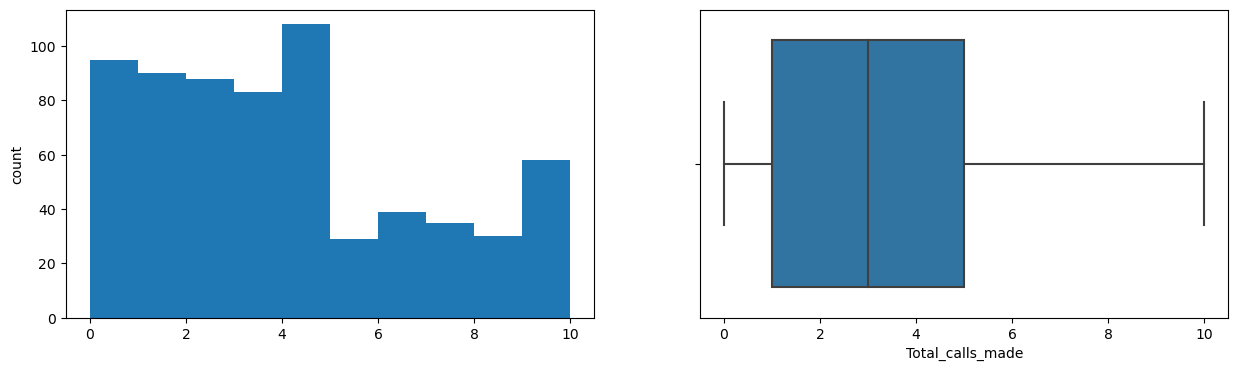

In [13]:
cont_cols = list(data.columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

As we observed earlier, avg_credit_limit has a high skew value with majority of customers on the low end of the limit. And it can be observed from the box plot, that there are several outliers on the high end of the range. The only other variable that has some outliers is the number of online visits per customer. Besided credit_limit, the only variable with high skew is the number of online visits by customers.

Since we observed earlier in the summary of the data, the variables have a very diverse range of values, so we should scale the data to be able to perform feasible analysis.

Now lets look at the heatmap.

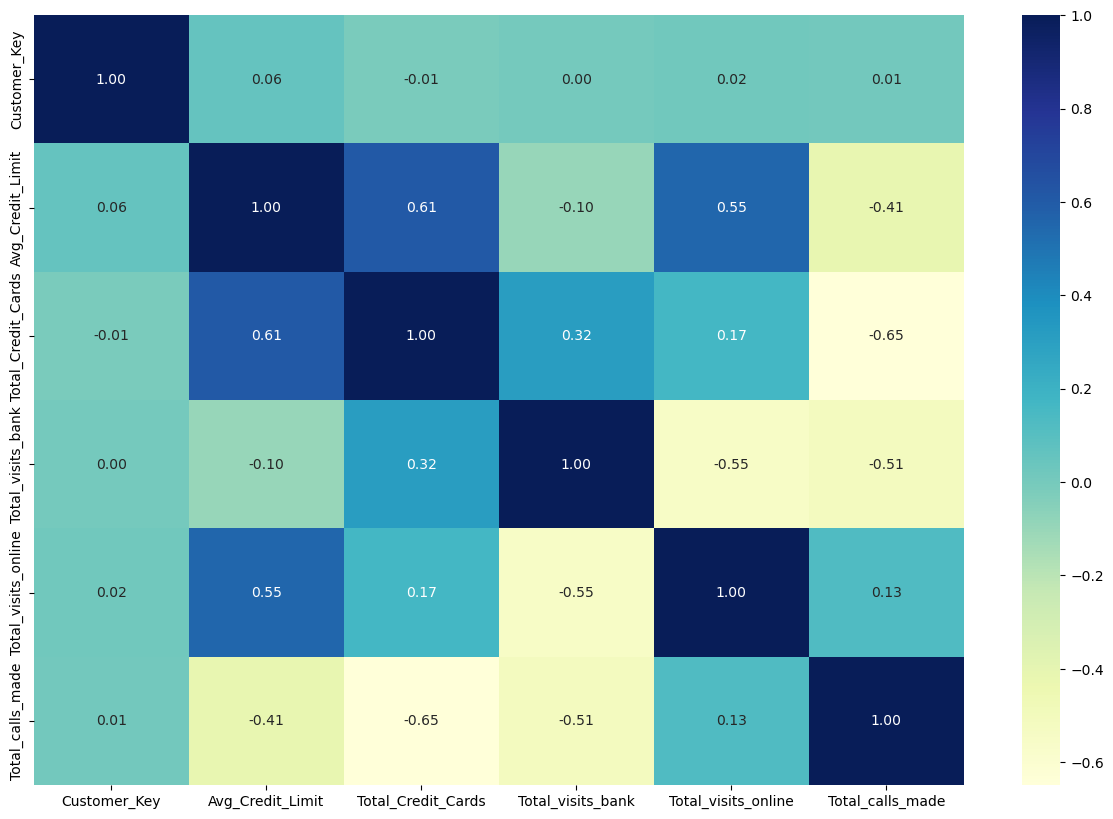

In [14]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f', cmap = "YlGnBu")

plt.show()

Most importantly, its a relief to see that there is no correlation between customer_key and any other variables. that means, the data is independant of the individual customers.

There is relatively high positive correlation between credit limit and total_credit_cards which makes sense, people with higher credit limits tend to have more credit cards.

We see a relatively high negative correlation between total_credit_cards and total_calls_made.

We also see some high negative correlation between different modes of contacting the bank, for example customers visiting the bank in person will tend to use other modes of contact slightly less.

### Scaling the Data ###

In [15]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_scaled.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.251195,1.767076,-1.241704,-0.858568,-0.546642,-1.257006
1,-0.650482,0.423440,-0.780379,-1.471163,2.516526,1.884177
2,-1.474051,0.423440,1.064922,-0.858568,0.134062,0.139075
3,-0.569114,-0.114014,0.142271,-0.858568,-0.546642,0.139075
4,-0.297848,1.767076,0.603597,-1.471163,3.197230,-0.209945


### Applying PCA on scaled data ###

In [16]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca2 = PCA(n_components = 6, random_state = 1)
data_scaled_pca2 = pd.DataFrame(pca2.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca2.explained_variance_ratio_

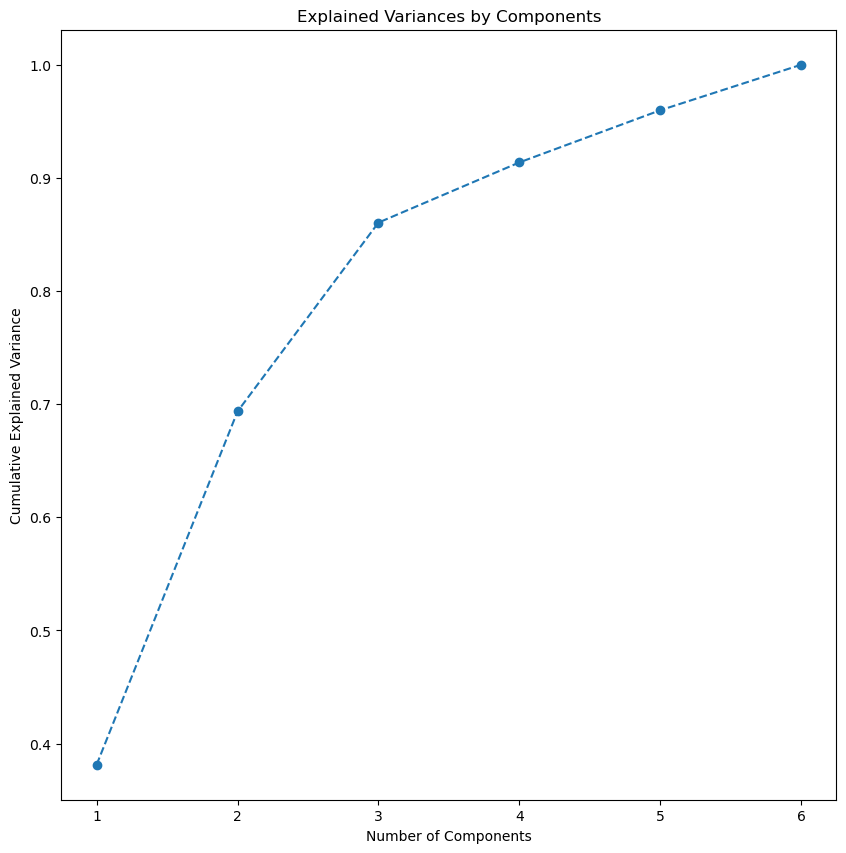

In [17]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 7), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

sum = 0

for ix, i in enumerate(exp_var):
    
    sum = sum + i
    
    if(sum>0.85):
        print('Min # of Principal Components to explain atleast 85% variance in the dataset =',ix + 1,)
        break

#### Finding the coefficients of the first three principal components: ####

In [19]:
cols = ['PC1', 'PC2', 'PC3']

pc1 = pd.DataFrame(np.round(pca2.components_.T[:, 0:3], 2), index = data_scaled.columns, columns = cols)
pc1

,PC1,PC2,PC3
Customer_Key,0.01,0.04,1.00
Avg_Credit_Limit,0.49,0.40,0.02
Total_Credit_Cards,0.60,0.03,-0.04
Total_visits_bank,0.28,-0.58,0.05
Total_visits_online,0.11,0.66,-0.04
Total_calls_made,-0.56,0.22,0.01


### K-Means ###
Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:

Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
Run for a range of Ks and store SSE for each run
Plot the SSE vs K and plot the elbow curve

In [20]:
#importing libraries necessary for K-means clustering analysis

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Now, we are ready to dive in. ####

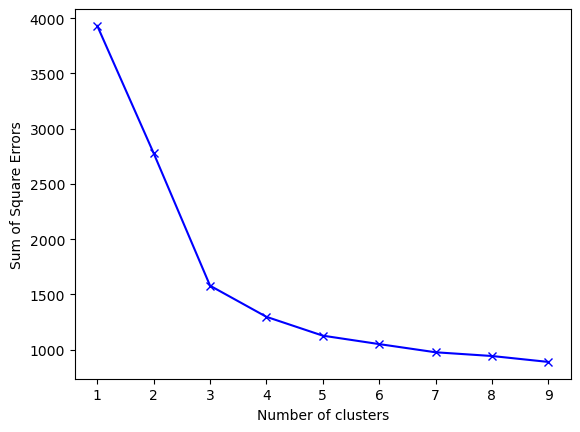

In [21]:
# 1. Creating an empty dictionary to store the SSE for each value of K
sse = {} 

# 2. Running a range of Ks from 1 through 9 and storing the SSE value for each K 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1, n_init = "auto").fit(data_scaled)
    
    sse[k] = kmeans.inertia_

# 3. Plotting Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of clusters")

plt.ylabel("Sum of Square Errors")

plt.show()

We observed from the plot above, that the elbow is clearly visible when cluster count is 3. After 3, the curve drops almost evenly. So lets pick 3 as a reasonable number of clusters.

In [22]:
kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto')

kmeans.fit(data_scaled)

# Adding predicted labels to the original data and the scaled data 
data_scaled['KMeans_Labels'] = kmeans.predict(data_scaled)

data['KMeans_Labels'] = kmeans.predict(data_scaled)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- KMeans_Labels


#### Create the cluster profiles using the summary statistics and box plots for each label ####

In [ ]:
# Calculating mean and median of the original data for each label
mean = data.groupby('KMeans_Labels').mean()

median = data.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T


#### Observations ####
Cluster2 contains people with highest number of cards and so they also have a highest credit limit. Cluster2 also makes the most online visits. Cluster0 is the opposite of Cluster2 with lowest credit limit, least number of cards. however, Cluster0 makes the most phone calls to the bank. Cluster2 contacts the banks the most but their preferred mode of communication is not calls made, rather they prefer online bank visits.

In [ ]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = data)
    plt.show()

#### Cluster Profiles: ####
Each cluster has their preferred method of contacting the bank; cluster0 preferes phone calls, cluster1 prefers in-person visits while cluster2 prefers online interaction with the bank. Cluster2 has the highest number of credit cards. As the total credit limit of a person is the sum of each of their credit card limits. Thats why we see that cluster2 also has the highest credit limit.

### Gaussian Mixture Model ###
Let's now create clusters using the Gaussian Mixture Model.

Apply the Gaussian Mixture Model algorithm on the pca components

In [ ]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_scaled)

data_scaled['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

#### Create the cluster profiles using the summary statistics and box plots for each label ####

In [ ]:
# Calculating the mean and the median of the original data for each label
original_features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

In [ ]:
cols_visualise = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for col in cols_visualise:
    sns.boxplot(x = 'GmmLabels', y = col, data = data)
    
    plt.show()

#### CLUSTER PROFILE: data looks similar to K-means clustering. See below. ####

#### Comparing Clusters: Looking at the description table, the results of the description table and the box plots are exactly the same. so GMM and K-means are both capturing the same information because their techniques are the same and for the given nature of the data, either techinque leads to the same calculations. ####

### K-Medoids ###
Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_scaled)

data_scaled['kmedoLabels'] = kmedo.predict(data_scaled)

data['kmedoLabels'] = kmedo.predict(data_scaled)

In [ ]:
original_features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

#### Create cluster profiles using the summary statistics and box plots for each label ####

In [ ]:
for col in cols_visualise:
    sns.boxplot(x = 'kmedoLabels', y = col, data = data)
    
    plt.show()

Cluster Profiles:Significant number of outliers detected in Average_credit_limit

Going from K-Means to K-Medoids, the median and mean values for average_credit_limit for Group1 have increased and have decreased for group2. We see a lot of similar trends that leads us to believe that

#### Comparing Clusters: ####
K-medoid found a lot of outliers on the high end for the average_Credit_limit. K-means was not able to find this.

### Conclusions and Business Recommendations ###

Customers in Group0 with the most number of phone calls to the bank tend to have the lowest number of credit cards. Which leads me to believe that over the phone customer service needs to improve its performance. Which will perhaps, encourage this set of customers to acquire more credit cards and add to the business of the bank. Or may be they need to be encouraged to visit the bank in person or online to increase their satisfaction level and therefore increase the business with the bank.

One more thing that comes to mind is the age might be the differentiating factor between the three groups. To elaborate, it appears that the 3 groups/clusters are three age group categories of the customers, with group0 being the oldest age group, group1 being the youngest generation and group2 being everyone in between. This makes the dataset very typical. For example, older people are not accustomed to online visits and also may want to avoid commuting to the bank due to several reasons. However, they are very comfortable with communicating over the phone. On the same note, older generation tends to keep the lowest number of credit cards, as they prefer to do more debit card, check or cash transactions. the young generation is usually eager to carry multiple credit cards to take advantage of credit card benefits. And they may be comfortable doing buisness online, and also may be visiting the bank more frequently to apply for credit cards in person.